In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import skew
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


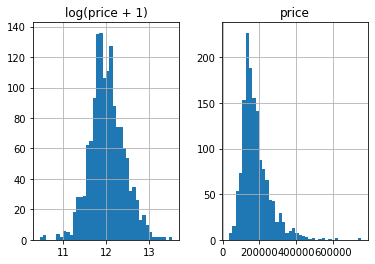

In [2]:
# comparing the price normalized vs non-normalized.
prices = pd.DataFrame({"price":df["SalePrice"], "log(price + 1)":np.log1p(df["SalePrice"])})
prices.hist(bins=40);

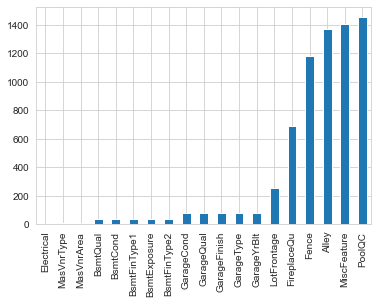

In [3]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar();

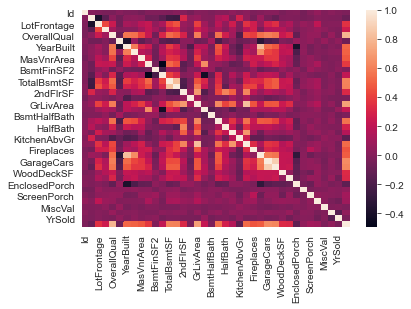

In [4]:
sns.heatmap(df.corr());

In [5]:
#log transform the target:
df["SalePrice"] = np.log1p(df["SalePrice"])

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,12.247699
1,2,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,12.109016
2,3,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,12.317171
3,4,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,11.849405
4,5,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,12.429220


In [6]:
df = pd.get_dummies(df)

In [7]:
df = df.fillna(df.mean())

In [8]:
X = df.drop(['SalePrice'], axis=1)
y = df.SalePrice

In [9]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    
    return(rmse)

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)

In [10]:
rmse_cv(model_lasso).mean()

0.12249370108933086